In [44]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import sys
sys.path.append('./RSAlgorithms/')


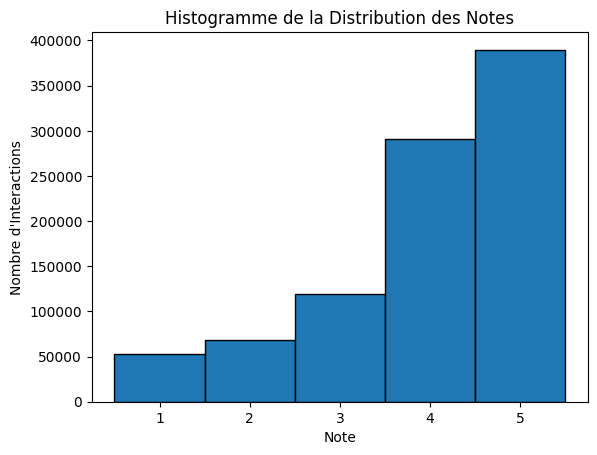

Nombre total d'interactions : 922267


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des données des notes
# Remplacez 'path_to_ratings_file' par le chemin de votre fichier de notes
ratings = pd.read_csv('./RSAlgorithms/data/ep_ratings.txt', sep=' ', names=['user', 'item', 'rating'])

# Taille du réseau d'interaction
total_interactions = len(ratings)

# Distribution des notes
plt.hist(ratings['rating'], bins=range(1, ratings['rating'].max() + 2), edgecolor='black', align='left')
plt.title("Histogramme de la Distribution des Notes")
plt.xlabel("Note")
plt.ylabel("Nombre d'Interactions")
plt.xticks(range(1, ratings['rating'].max() + 1))
plt.show()

print(f"Nombre total d'interactions : {total_interactions}")






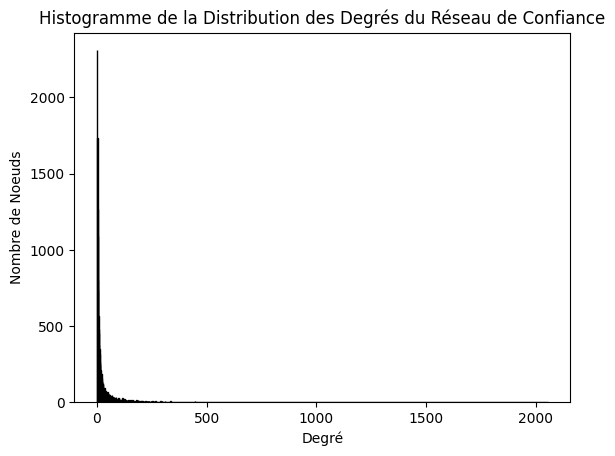

Nombre de nœuds dans le réseau de confiance : 18098
Nombre d'arêtes dans le réseau de confiance : 355727
Densité du réseau de confiance : 0.001086


In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Chargement des données de confiance
# Remplacez 'path_to_trust_file' par le chemin de votre fichier de confiance
trust_data = pd.read_csv('./RSAlgorithms/data/ep_trust.txt', sep=' ', names=['source', 'target', 'trust'])

# Création du réseau
G = nx.from_pandas_edgelist(trust_data, 'source', 'target', create_using=nx.DiGraph())

# Taille du réseau de confiance
network_nodes = G.number_of_nodes()
network_edges = G.number_of_edges()

# Densité du réseau
network_density = nx.density(G)

# Distribution des degrés
degree_distribution = [deg for node, deg in nx.degree(G)]

# Histogramme de la distribution des degrés
plt.hist(degree_distribution, bins=range(max(degree_distribution)+1), edgecolor='black')
plt.title("Histogramme de la Distribution des Degrés du Réseau de Confiance")
plt.xlabel("Degré")
plt.ylabel("Nombre de Noeuds")
plt.show()

print(f"Nombre de nœuds dans le réseau de confiance : {network_nodes}")
print(f"Nombre d'arêtes dans le réseau de confiance : {network_edges}")
print(f"Densité du réseau de confiance : {network_density:.6f}")


In [48]:
from RSAlgorithms.utility.cross_validation import split_5_folds
from RSAlgorithms.configx.configx import ConfigX
import os 
import numpy as np
import pandas as pd

In [49]:
configx = ConfigX()

In [50]:
configx.rating_path

'./RSAlgorithms/data/ep10_ratings.txt'

In [51]:
# Faut faire ça jsp pourquoi MANGE TES MORTS LINDA
split_5_folds(configx)

D1
D2
D3
D4
ep10 -fold0 data generated finished!
ep10 -fold1 data generated finished!
ep10 -fold2 data generated finished!
ep10 -fold3 data generated finished!
ep10 -fold4 data generated finished!
All Data Generated Done!


In [52]:
from RSAlgorithms.model.social_rec import SocialRec

In [53]:
rmses = []
maes = []
tcsr = SocialRec()
for i in range(tcsr.config.k_fold_num):
    print('the %dth cross validation training' % i)
    tcsr.train_model(i)
    rmse, mae = tcsr.predict_model()
    rmses.append(rmse)
    maes.append(mae)
rmse_avg = sum(rmses) / 5
mae_avg = sum(maes) / 5
print("the rmses are %s" % rmses)
print("the maes are %s" % maes)
print("the average of rmses is %s " % rmse_avg)
print("the average of maes is %s " % mae_avg)

{
    'dataset_name': 'ep10',
    'k_fold_num': 5,
    'rating_path': './RSAlgorithms/data/ep10_ratings.txt',
    'rating_cv_path': './RSAlgorithms/data/cv/',
    'trust_path': './RSAlgorithms/data/ep10_trust.txt',
    'sep': ' ',
    'random_state': 0,
    'size': 0.8,
    'min_val': 0.5,
    'max_val': 4.0,
    'coldUserRating': 5,
    'factor': 10,
    'threshold': 0.0001,
    'lr': 0.01,
    'maxIter': 100,
    'lambdaP': 0.001,
    'lambdaQ': 0.001,
    'beta': 0.01,
    'gamma': 0,
    'isEarlyStopping': False,
    'result_path': './RSAlgorithms/results/',
    'model_path': './RSAlgorithms/model/',
    'result_log_path': 'log/'
}
the 0th cross validation training
<class 'RSAlgorithms.model.social_rec.SocialRec'> iteration 1: loss = 59661.2784, delta_loss = -59661.27843 learning_Rate = 0.01000 rmse=1.97872 mae=1.52171
<class 'RSAlgorithms.model.social_rec.SocialRec'> iteration 2: loss = 41944.7887, delta_loss = 17716.48973 learning_Rate = 0.01000 rmse=1.83626 mae=1.40688
<class 'R

In [54]:
from RSAlgorithms.model.social_rec_BAPT import ExtendedSocialRec

/Users/baptiste/.pyenv/versions/3.9.16/envs/m2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
from RSAlgorithms.configx.configx import ConfigX

In [56]:
c = ConfigX()

In [57]:
model = ExtendedSocialRec()

{
    'dataset_name': 'ep10',
    'k_fold_num': 5,
    'rating_path': './RSAlgorithms/data/ep10_ratings.txt',
    'rating_cv_path': './RSAlgorithms/data/cv/',
    'trust_path': './RSAlgorithms/data/ep10_trust.txt',
    'sep': ' ',
    'random_state': 0,
    'size': 0.8,
    'min_val': 0.5,
    'max_val': 4.0,
    'coldUserRating': 5,
    'factor': 10,
    'threshold': 0.0001,
    'lr': 0.01,
    'maxIter': 100,
    'lambdaP': 0.001,
    'lambdaQ': 0.001,
    'beta': 0.01,
    'gamma': 0,
    'isEarlyStopping': False,
    'result_path': './RSAlgorithms/results/',
    'model_path': './RSAlgorithms/model/',
    'result_log_path': 'log/'
}


In [58]:
model.init_model(k=4)

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:03<00:00, 14.24it/s]


In [59]:
model.train_model(k=4)

Generating walks (CPU: 2): 100%|██████████| 50/50 [00:05<00:00,  8.50it/s]


(2048, 2, 0.0)


TypeError: cannot unpack non-iterable int object